## Lab 2 - Andre Piccolo - 300347025

## a.Load the python library

In [1]:
# Import pandas, numpy and seaborn libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## b.Read the data

In [2]:
carDataFrame = pd.read_csv('Lab01_APi47025_cleaned.csv')
carDataFrame.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,mmr,price
0,2013,ford,mustang,v6,coupe,automatic,2.2,36941.0,silver,black,15000.0,12800.0
1,2013,dodge,dart,limited,sedan,automatic,3.7,27601.0,white,tan,13100.0,14800.0
2,2014,ford,fusion,se,sedan,automatic,3.5,14184.0,silver,black,17700.0,16500.0
3,2006,nissan,murano,sl,suv,automatic,4.3,193516.0,silver,black,3175.0,4400.0
4,2005,saturn,ion,2,sedan,automatic,3.8,104969.0,white,gray,2500.0,2900.0


## c.Drop unneeded columns

In [3]:
# columns model and trim should be dropped
carDataFrame.drop(columns={'model','trim'}, axis=1, inplace=True)
carDataFrame.head()

,year,make,body,transmission,condition,odometer,color,interior,mmr,price
0,2013,ford,coupe,automatic,2.2,36941.0,silver,black,15000.0,12800.0
1,2013,dodge,sedan,automatic,3.7,27601.0,white,tan,13100.0,14800.0
2,2014,ford,sedan,automatic,3.5,14184.0,silver,black,17700.0,16500.0
3,2006,nissan,suv,automatic,4.3,193516.0,silver,black,3175.0,4400.0
4,2005,saturn,sedan,automatic,3.8,104969.0,white,gray,2500.0,2900.0


## d.Reduce model’s unique values

In [4]:
# Use unique() and values_count() to find out the distribution of unique car models in the dataset
print(carDataFrame.make.unique())
print(carDataFrame.make.value_counts())

['ford' 'dodge' 'nissan' 'saturn' 'chevrolet' 'jeep' 'toyota' 'chrysler'
 'lexus' 'mitsubishi' 'bmw' 'mazda' 'acura' 'infiniti' 'mercedes-benz'
 'honda' 'kia' 'volkswagen' 'hyundai' 'gmc' 'buick' 'subaru' 'lincoln'
 'mini' 'ram' 'mercury' 'cadillac' 'pontiac' 'audi' 'volvo' 'oldsmobile'
 'porsche' 'scion' 'hummer' 'smart' 'suzuki' 'land rover' 'jaguar' 'isuzu'
 'bentley' 'fiat' 'plymouth' 'saab' 'rolls-royce' 'tesla' 'ferrari'
 'aston martin' 'maserati' 'geo' 'lamborghini']
ford             18294
chevrolet        11808
nissan           10571
toyota            7686
dodge             6069
honda             5295
hyundai           4275
bmw               4009
kia               3533
chrysler          3396
mercedes-benz     3301
infiniti          3139
jeep              3028
volkswagen        2467
lexus             2392
gmc               2108
mazda             1617
cadillac          1493
audi              1148
lincoln           1119
acura             1100
buick             1002
subaru         

In [5]:
# Change the string in the model columns to lowercase letters.
carDataFrame.make = carDataFrame.make.str.lower()

# Replace any dash “-“ with underscore “_”
carDataFrame['make'] = carDataFrame['make'].str.replace("-","_", regex=False)
carDataFrame.make.value_counts()

ford             18294
chevrolet        11808
nissan           10571
toyota            7686
dodge             6069
honda             5295
hyundai           4275
bmw               4009
kia               3533
chrysler          3396
mercedes_benz     3301
infiniti          3139
jeep              3028
volkswagen        2467
lexus             2392
gmc               2108
mazda             1617
cadillac          1493
audi              1148
lincoln           1119
acura             1100
buick             1002
subaru             966
ram                888
pontiac            839
mitsubishi         833
volvo              720
mini               634
saturn             515
mercury            349
scion              326
land rover         317
porsche            268
jaguar             266
suzuki             184
fiat               161
hummer             154
smart               91
saab                87
oldsmobile          83
isuzu               39
bentley             17
maserati            17
aston marti

In [6]:
# Drop the rows whose car model is represented with less than 500 data points
for makeValue in carDataFrame.make.unique():
    if((carDataFrame.make.values == makeValue).sum() < 500): # select only 'make' is less than 500
        carDataFrame = carDataFrame.loc[carDataFrame.make != makeValue] # Save only 'make' is different from selected
carDataFrame.make.value_counts()

ford             18294
chevrolet        11808
nissan           10571
toyota            7686
dodge             6069
honda             5295
hyundai           4275
bmw               4009
kia               3533
chrysler          3396
mercedes_benz     3301
infiniti          3139
jeep              3028
volkswagen        2467
lexus             2392
gmc               2108
mazda             1617
cadillac          1493
audi              1148
lincoln           1119
acura             1100
buick             1002
subaru             966
ram                888
pontiac            839
mitsubishi         833
volvo              720
mini               634
saturn             515
Name: make, dtype: int64

In [7]:
# Combine the models that are represented with less than 1000 data points into a new model category: “other”
for makeValue in carDataFrame.make.unique():
    if((carDataFrame.make.values == makeValue).sum() < 1000):
        carDataFrame.loc[carDataFrame.make.str.contains(makeValue), 'make'] = 'other'
carDataFrame.make.value_counts()

ford             18294
chevrolet        11808
nissan           10571
toyota            7686
dodge             6069
other             5395
honda             5295
hyundai           4275
bmw               4009
kia               3533
chrysler          3396
mercedes_benz     3301
infiniti          3139
jeep              3028
volkswagen        2467
lexus             2392
gmc               2108
mazda             1617
cadillac          1493
audi              1148
lincoln           1119
acura             1100
buick             1002
Name: make, dtype: int64

## e.Find out the summary statistics of the dataset using describe().

In [8]:
carDataFrame.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

,year,condition,odometer,mmr,price
count,104245.000000,104245.000000,104245.000000,104245.000000,104245.000000
mean,2010.281683,3.438326,66086.010878,13906.079668,13745.939882
std,3.798264,0.946005,52173.887578,9088.694844,9177.502821
min,1990.000000,1.000000,1.000000,25.000000,1.000000
5%,2003.000000,1.900000,10329.000000,2000.000000,1700.000000
25%,2008.000000,2.700000,27609.000000,7700.000000,7400.000000
50%,2012.000000,3.600000,49811.000000,12500.000000,12400.000000
75%,2013.000000,4.200000,95504.000000,18450.000000,18400.000000
95%,2014.000000,4.800000,166626.400000,30200.000000,30200.000000
max,2015.000000,5.000000,999999.000000,170000.000000,173000.000000


## f.Produce the correlation of the dataset

In [9]:
carDataFrame.corr()

,year,condition,odometer,mmr,price
year,1.000000,0.549665,-0.777504,0.613568,0.602395
condition,0.549665,1.000000,-0.535851,0.496070,0.553919
odometer,-0.777504,-0.535851,1.000000,-0.600412,-0.593948
mmr,0.613568,0.496070,-0.600412,1.000000,0.982945
price,0.602395,0.553919,-0.593948,0.982945,1.000000


## g.Univariate data analysis

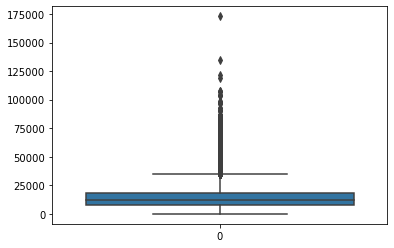

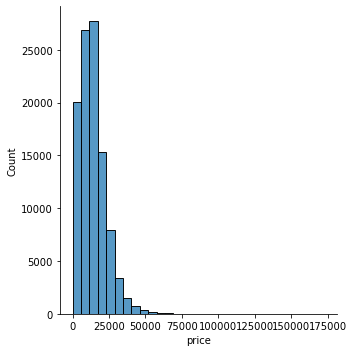

In [10]:
# Produce the distribution plot and boxplot of the price feature
sns.boxplot(data=carDataFrame.price)
sns.displot(carDataFrame.price, bins=30)

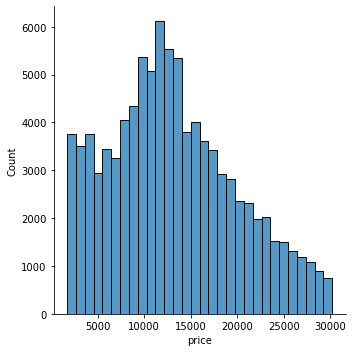

In [11]:
# keep the data points whose price value is between 5% percentile and 95% percentile
indexToRemove = carDataFrame.loc[(carDataFrame.price < 1700)].index # remove under 5% value
carDataFrame.drop(index=indexToRemove, inplace=True)

indexToRemove = carDataFrame.loc[(carDataFrame.price > 30200)].index # remove above 95% value
carDataFrame.drop(index=indexToRemove, inplace=True)

sns.displot(carDataFrame.price, bins=30)

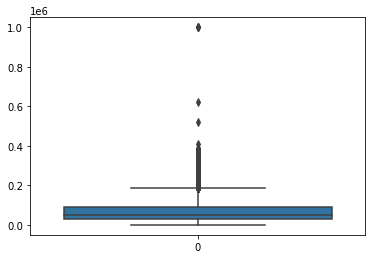

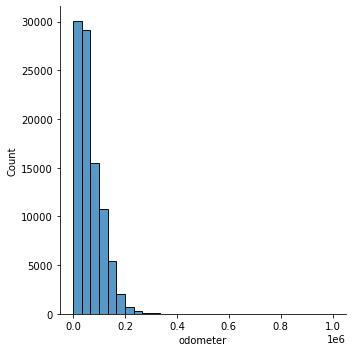

In [12]:
# Produce the distribution plot and boxplot of the odometer feature
sns.boxplot(data=carDataFrame.odometer)
sns.displot(carDataFrame.odometer, bins=30)

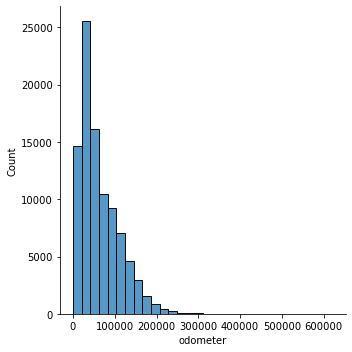

In [13]:
# drop the datapoints whose odometer value is either max (999999) or min (1)
indexToRemove = carDataFrame.loc[(carDataFrame.odometer == 999999) | (carDataFrame.odometer == 1)].index
carDataFrame.drop(index=indexToRemove, inplace=True)
sns.displot(carDataFrame.odometer, bins=30)

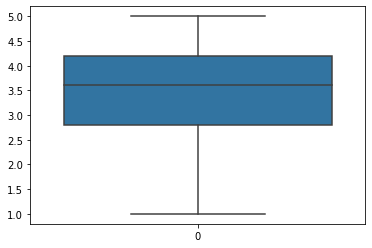

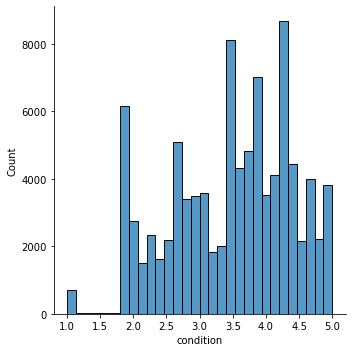

In [14]:
# keep the condition and mmr feature as it is.
sns.boxplot(data=carDataFrame.condition)
sns.displot(carDataFrame.condition, bins=30)

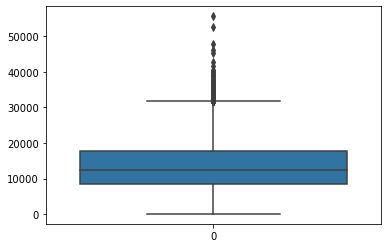

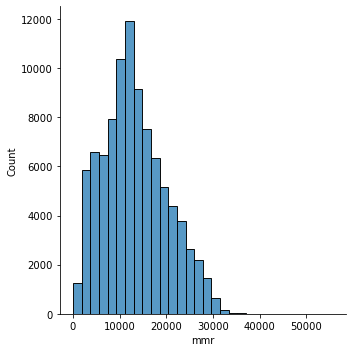

In [15]:
sns.boxplot(data=carDataFrame.mmr)
sns.displot(carDataFrame.mmr, bins=30)

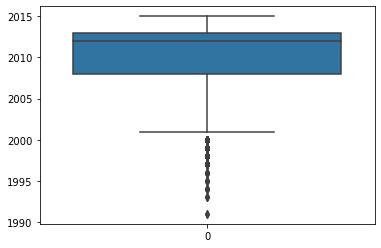

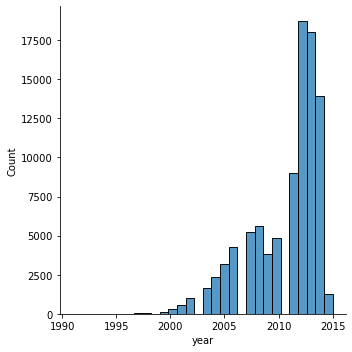

In [16]:
#  Feel free to practice analyzing the year feature
sns.boxplot(data=carDataFrame.year)
sns.displot(carDataFrame.year, bins=30)

## h.Multivariate data analysis

<AxesSubplot:xlabel='mmr', ylabel='price'>

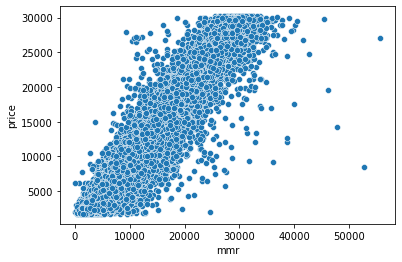

In [17]:
# Create scatter plot to compare mmr and price
sns.scatterplot(x=carDataFrame.mmr, y=carDataFrame.price)

<AxesSubplot:xlabel='odometer', ylabel='price'>

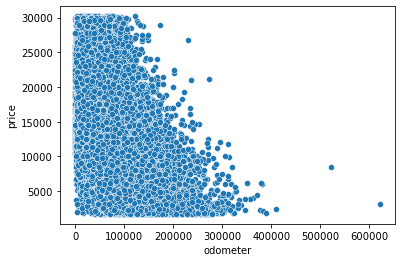

In [18]:
# Create a scatter plot to compare odometer and price
sns.scatterplot(x=carDataFrame.odometer, y=carDataFrame.price)
# The relation between odometer and price is not good because between 0 and 100000 we have car with all the ranges of price
# Odometer seems to have some relation with price just after 100000. After that when odometer goes up, price goes down.

<AxesSubplot:xlabel='year', ylabel='price'>

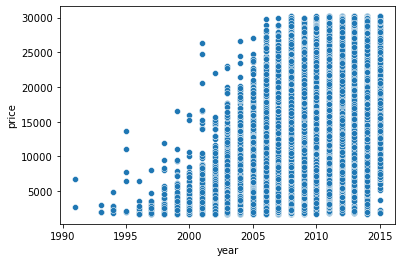

In [19]:
# Create a scatter plot to compare year and price
sns.scatterplot(x=carDataFrame.year, y=carDataFrame.price)
# Relation seems not good because after 2005, we have cars in all prices, there is not a clear relation between both

<AxesSubplot:xlabel='condition', ylabel='price'>

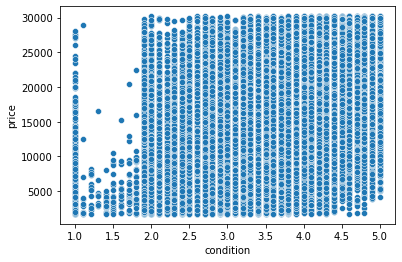

In [20]:
# Create a scatter plot to compare condition and price
sns.scatterplot(x=carDataFrame.condition, y=carDataFrame.price)
# The condition seems the weak relation with price, we almost have all prices in all condition

## i.Produce the countplot

<AxesSubplot:xlabel='body', ylabel='count'>

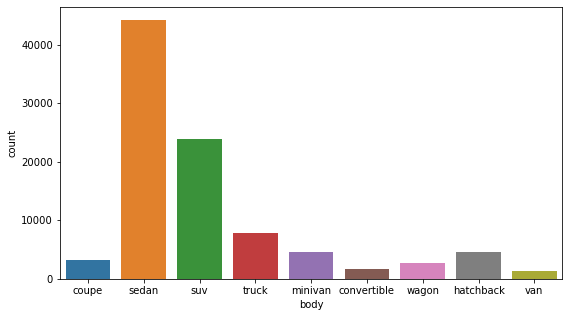

In [21]:
# body
plt.figure(figsize=(9,5))
sns.countplot(x='body', data=carDataFrame)

<AxesSubplot:xlabel='transmission', ylabel='count'>

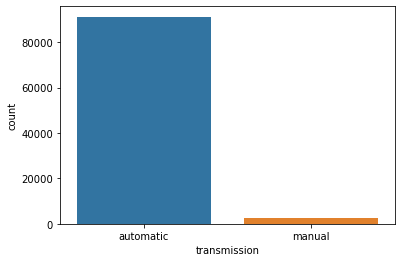

In [22]:
# transmission
sns.countplot(x='transmission', data=carDataFrame)

<AxesSubplot:xlabel='color', ylabel='count'>

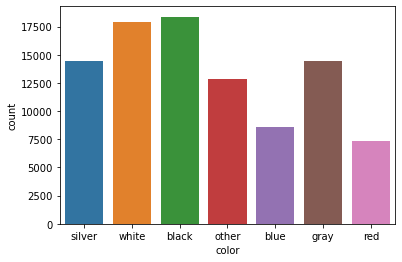

In [23]:
# color
sns.countplot(x='color', data=carDataFrame)

<AxesSubplot:xlabel='interior', ylabel='count'>

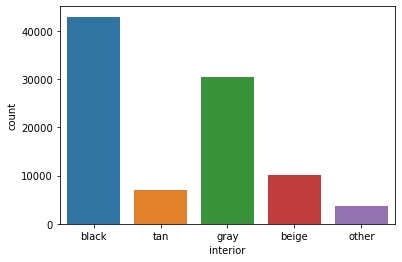

In [24]:
# interior
sns.countplot(x='interior', data=carDataFrame)

<AxesSubplot:xlabel='condition', ylabel='count'>

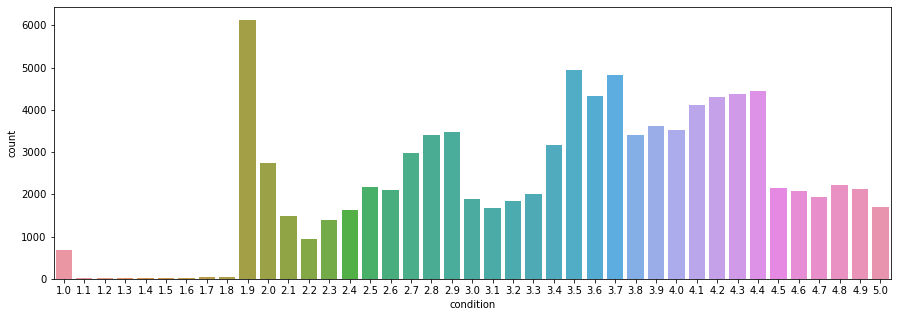

In [25]:
# condition
plt.figure(figsize=(15,5)) # just to show 'condition' values in a better visualization
sns.countplot(x='condition', data=carDataFrame)

## j.Data transformation: binning

<AxesSubplot:xlabel='condition', ylabel='count'>

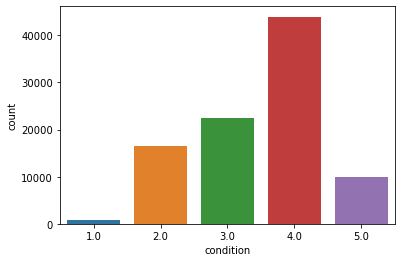

In [26]:
# Notice that the condition values range from 1.0 until 4.9. We will reduce this into discreet values: 1, 2, 3, 4, 5
carDataFrame.condition = carDataFrame.condition.round(0)
sns.countplot(x='condition', data=carDataFrame)

## k.Data transformation: dummy features

In [27]:
# Create dummy values for the body feature with drop_first=True and prefix=”body”. 
dummyBody = pd.get_dummies(carDataFrame.body, prefix="body", drop_first=True)

# Join the dummy with the original dataframe.
carDataFrame = pd.concat([carDataFrame, dummyBody], axis=1)
carDataFrame.head()

,year,make,body,transmission,condition,odometer,color,interior,mmr,price,body_coupe,body_hatchback,body_minivan,body_sedan,body_suv,body_truck,body_van,body_wagon
0,2013,ford,coupe,automatic,2.0,36941.0,silver,black,15000.0,12800.0,1,0,0,0,0,0,0,0
1,2013,dodge,sedan,automatic,4.0,27601.0,white,tan,13100.0,14800.0,0,0,0,1,0,0,0,0
2,2014,ford,sedan,automatic,4.0,14184.0,silver,black,17700.0,16500.0,0,0,0,1,0,0,0,0
3,2006,nissan,suv,automatic,4.0,193516.0,silver,black,3175.0,4400.0,0,0,0,0,1,0,0,0
4,2005,other,sedan,automatic,4.0,104969.0,white,gray,2500.0,2900.0,0,0,0,1,0,0,0,0


In [28]:
# Create dummy values for the transmission feature with drop_first=True and prefix=”trans”.
dummyTransmission = pd.get_dummies(carDataFrame.transmission, prefix="trans", drop_first=True)

# Join the dummy with the original dataframe.
carDataFrame = pd.concat([carDataFrame, dummyTransmission], axis=1)
carDataFrame.head()

,year,make,body,transmission,condition,odometer,color,interior,mmr,price,body_coupe,body_hatchback,body_minivan,body_sedan,body_suv,body_truck,body_van,body_wagon,trans_manual
0,2013,ford,coupe,automatic,2.0,36941.0,silver,black,15000.0,12800.0,1,0,0,0,0,0,0,0,0
1,2013,dodge,sedan,automatic,4.0,27601.0,white,tan,13100.0,14800.0,0,0,0,1,0,0,0,0,0
2,2014,ford,sedan,automatic,4.0,14184.0,silver,black,17700.0,16500.0,0,0,0,1,0,0,0,0,0
3,2006,nissan,suv,automatic,4.0,193516.0,silver,black,3175.0,4400.0,0,0,0,0,1,0,0,0,0
4,2005,other,sedan,automatic,4.0,104969.0,white,gray,2500.0,2900.0,0,0,0,1,0,0,0,0,0


In [29]:
# Create dummy values for the make feature with prefix=”make”. 
dummyMake = pd.get_dummies(carDataFrame.make, prefix="make")

# Drop the make_other column from the created dummy features. 
dummyMake.drop(columns={'make_other'}, axis=1, inplace=True)

# Then, join the dummy with the other dataframe
carDataFrame = pd.concat([carDataFrame, dummyMake], axis=1)
carDataFrame.head()

,year,make,body,transmission,condition,odometer,color,interior,mmr,price,...,make_infiniti,make_jeep,make_kia,make_lexus,make_lincoln,make_mazda,make_mercedes_benz,make_nissan,make_toyota,make_volkswagen
0,2013,ford,coupe,automatic,2.0,36941.0,silver,black,15000.0,12800.0,...,0,0,0,0,0,0,0,0,0,0
1,2013,dodge,sedan,automatic,4.0,27601.0,white,tan,13100.0,14800.0,...,0,0,0,0,0,0,0,0,0,0
2,2014,ford,sedan,automatic,4.0,14184.0,silver,black,17700.0,16500.0,...,0,0,0,0,0,0,0,0,0,0
3,2006,nissan,suv,automatic,4.0,193516.0,silver,black,3175.0,4400.0,...,0,0,0,0,0,0,0,1,0,0
4,2005,other,sedan,automatic,4.0,104969.0,white,gray,2500.0,2900.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Create dummy values for the color feature with prefix=”color”. 
dummyColor = pd.get_dummies(carDataFrame.color, prefix="color")

# Drop the color_other column from the created dummy features. 
dummyColor.drop(columns={'color_other'}, axis=1, inplace=True)

# Then, join the dummy with the original dataframe
carDataFrame = pd.concat([carDataFrame, dummyColor], axis=1)
carDataFrame.head()

,year,make,body,transmission,condition,odometer,color,interior,mmr,price,...,make_mercedes_benz,make_nissan,make_toyota,make_volkswagen,color_black,color_blue,color_gray,color_red,color_silver,color_white
0,2013,ford,coupe,automatic,2.0,36941.0,silver,black,15000.0,12800.0,...,0,0,0,0,0,0,0,0,1,0
1,2013,dodge,sedan,automatic,4.0,27601.0,white,tan,13100.0,14800.0,...,0,0,0,0,0,0,0,0,0,1
2,2014,ford,sedan,automatic,4.0,14184.0,silver,black,17700.0,16500.0,...,0,0,0,0,0,0,0,0,1,0
3,2006,nissan,suv,automatic,4.0,193516.0,silver,black,3175.0,4400.0,...,0,1,0,0,0,0,0,0,1,0
4,2005,other,sedan,automatic,4.0,104969.0,white,gray,2500.0,2900.0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
# Create dummy values for the interior feature with prefix=”inter”. 
dummyInterior = pd.get_dummies(carDataFrame.interior, prefix="inter")

# Drop the inter_other column from the created dummy features. 
dummyInterior.drop(columns={'inter_other'}, axis=1, inplace=True)

# Then, join the dummy with the original dataframe
carDataFrame = pd.concat([carDataFrame, dummyInterior], axis=1)
carDataFrame.head()

,year,make,body,transmission,condition,odometer,color,interior,mmr,price,...,color_black,color_blue,color_gray,color_red,color_silver,color_white,inter_beige,inter_black,inter_gray,inter_tan
0,2013,ford,coupe,automatic,2.0,36941.0,silver,black,15000.0,12800.0,...,0,0,0,0,1,0,0,1,0,0
1,2013,dodge,sedan,automatic,4.0,27601.0,white,tan,13100.0,14800.0,...,0,0,0,0,0,1,0,0,0,1
2,2014,ford,sedan,automatic,4.0,14184.0,silver,black,17700.0,16500.0,...,0,0,0,0,1,0,0,1,0,0
3,2006,nissan,suv,automatic,4.0,193516.0,silver,black,3175.0,4400.0,...,0,0,0,0,1,0,0,1,0,0
4,2005,other,sedan,automatic,4.0,104969.0,white,gray,2500.0,2900.0,...,0,0,0,0,0,1,0,0,1,0


In [32]:
# Drop the following columns from the dataframe: body, transmission, make, color, interior
carDataFrame.drop(columns={'body', 'transmission', 'make', 'color', 'interior'}, axis=1, inplace=True)
carDataFrame.head(5)

,year,condition,odometer,mmr,price,body_coupe,body_hatchback,body_minivan,body_sedan,body_suv,...,color_black,color_blue,color_gray,color_red,color_silver,color_white,inter_beige,inter_black,inter_gray,inter_tan
0,2013,2.0,36941.0,15000.0,12800.0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2013,4.0,27601.0,13100.0,14800.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,2014,4.0,14184.0,17700.0,16500.0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,2006,4.0,193516.0,3175.0,4400.0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2005,4.0,104969.0,2500.0,2900.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


## l.Check the dataframe with info()

In [33]:
carDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93916 entries, 0 to 106630
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                93916 non-null  int64  
 1   condition           93916 non-null  float64
 2   odometer            93916 non-null  float64
 3   mmr                 93916 non-null  float64
 4   price               93916 non-null  float64
 5   body_coupe          93916 non-null  uint8  
 6   body_hatchback      93916 non-null  uint8  
 7   body_minivan        93916 non-null  uint8  
 8   body_sedan          93916 non-null  uint8  
 9   body_suv            93916 non-null  uint8  
 10  body_truck          93916 non-null  uint8  
 11  body_van            93916 non-null  uint8  
 12  body_wagon          93916 non-null  uint8  
 13  trans_manual        93916 non-null  uint8  
 14  make_acura          93916 non-null  uint8  
 15  make_audi           93916 non-null  uint8  
 16  mak

## m.Use reset_index()

In [34]:
carDataFrame.reset_index(drop=True, inplace=True)
carDataFrame.head(10)

,year,condition,odometer,mmr,price,body_coupe,body_hatchback,body_minivan,body_sedan,body_suv,...,color_black,color_blue,color_gray,color_red,color_silver,color_white,inter_beige,inter_black,inter_gray,inter_tan
0,2013,2.0,36941.0,15000.0,12800.0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2013,4.0,27601.0,13100.0,14800.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,2014,4.0,14184.0,17700.0,16500.0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,2006,4.0,193516.0,3175.0,4400.0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2005,4.0,104969.0,2500.0,2900.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
5,2010,5.0,64812.0,19650.0,21700.0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
6,2013,2.0,50158.0,10350.0,6400.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
7,2013,5.0,22444.0,22800.0,23200.0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
8,2012,4.0,92868.0,10450.0,9000.0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
9,2013,4.0,36174.0,24600.0,27600.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## n.Save the dataframe

In [35]:
carDataFrame.to_csv('Lab02_prepared.csv',index=False)

# Check saved file
carDataFrameCleaned = pd.read_csv('Lab02_prepared.csv')
carDataFrameCleaned.head()

,year,condition,odometer,mmr,price,body_coupe,body_hatchback,body_minivan,body_sedan,body_suv,...,color_black,color_blue,color_gray,color_red,color_silver,color_white,inter_beige,inter_black,inter_gray,inter_tan
0,2013,2.0,36941.0,15000.0,12800.0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2013,4.0,27601.0,13100.0,14800.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,2014,4.0,14184.0,17700.0,16500.0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,2006,4.0,193516.0,3175.0,4400.0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2005,4.0,104969.0,2500.0,2900.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
